In [1]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import datetime
import csv
import math
import numpy as np

In [5]:
path = 'D://小羽飞刀/算法/边界报警/'
suffix = '.csv'
alldata = {}
for num in range(1,11):
    with open(path+str(num)+suffix, 'r', newline='',encoding='utf-8-sig') as csvfile:
        spamreader = csv.reader(csvfile)
        next(spamreader) # 跳过表头
        for row in spamreader:
            tempTime = datetime.datetime.strptime(row[0],"%Y-%m-%d %H:%M:%S.%f")
            tempLine = int(row[1])
            tempLoad = int(row[2])
            if num in alldata:
                new = pd.DataFrame([[tempTime,tempLine,tempLoad]],columns=['time','line','load'])
                alldata[num] = pd.concat([alldata[num], new], ignore_index=True)
            else:
                alldata[num] = pd.DataFrame([[tempTime,tempLine,tempLoad]],columns=['time','line','load'])
for num in alldata:
    alldata[num] = alldata[num].sort_values(by='time')
print(alldata)

{1:                        time  line  load
0   2022-09-15 17:33:19.869    14    33
1   2022-09-15 17:33:19.896    14    33
2   2022-09-15 17:33:19.923    14    32
3   2022-09-15 17:33:19.957    14    31
4   2022-09-15 17:33:19.992    14    32
..                      ...   ...   ...
124 2022-09-15 17:33:23.622    18    33
125 2022-09-15 17:33:23.660    18    32
126 2022-09-15 17:33:23.684    18    32
127 2022-09-15 17:33:23.713    18    33
128 2022-09-15 17:33:23.740    18    33

[129 rows x 3 columns], 2:                        time  line  load
0   2022-09-15 17:33:23.768    14    34
1   2022-09-15 17:33:23.795    14    35
2   2022-09-15 17:33:23.824    14    35
3   2022-09-15 17:33:23.871    14    35
4   2022-09-15 17:33:23.909    14    35
..                      ...   ...   ...
129 2022-09-15 17:33:27.660    18    30
130 2022-09-15 17:33:27.687    18    30
131 2022-09-15 17:33:27.716    18    31
132 2022-09-15 17:33:27.744    18    31
133 2022-09-15 17:33:27.770    18    33

[134 ro

In [26]:
allline = sorted(set(alldata[1]['line']))
refline = []
for line in allline:
    if len(alldata[1].loc[alldata[num]['line'] == line]) > 5:
        refline.append(line)
print(refline)

refdata = {}
for num in range(1,11):
    for i in range(len(refline)):
        tempdata = alldata[num].loc[alldata[num]['line'] == refline[i]]
        tempdata = tempdata.sort_values(by='time')
        if num in refdata:
            new = pd.DataFrame([[refline[i],refline[i],list(tempdata['load']),list(tempdata['line'])]],columns=['start','end','loads','line'])
            refdata[num] = pd.concat([refdata[num], new], ignore_index=True)
        else:
            refdata[num] = pd.DataFrame([[refline[i],refline[i],list(tempdata['load']),list(tempdata['line'])]],columns=['start','end','loads','line'])
        tempstart = refline[i] + 1
        tempend = refline[i] + 1
        if i < len(refline) - 1:
            if tempstart == refline[i + 1]:
                # 无中间段 跳过
                continue
            tempend = refline[i + 1] - 1
        else:
            tempend = 10000
        tempdata = alldata[num].loc[(alldata[num]['line'] >= tempstart) & (alldata[num]['line'] <= tempend)]
        new = pd.DataFrame([[tempstart,tempend,list(tempdata['load']),list(tempdata['line'])]],columns=['start','end','loads','line'])
        refdata[num] = pd.concat([refdata[num], new], ignore_index=True)
print(refdata)

[14, 16, 18]
{1:    start    end                                              loads  \
0     14     14                           [33, 33, 32, 31, 32, 32]   
1     15     15                                                 []   
2     16     16  [33, 33, 32, 33, 32, 33, 33, 33, 34, 46, 69, 8...   
3     17     17                                   [36, 35, 34, 33]   
4     18     18  [34, 33, 34, 34, 32, 32, 32, 32, 33, 32, 33, 3...   
5     19  10000                                                 []   

                                                line  
0                           [14, 14, 14, 14, 14, 14]  
1                                                 []  
2  [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...  
3                                   [17, 17, 17, 17]  
4  [18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...  
5                                                 []  , 2:    start    end                                              loads  \
0     14     14                  

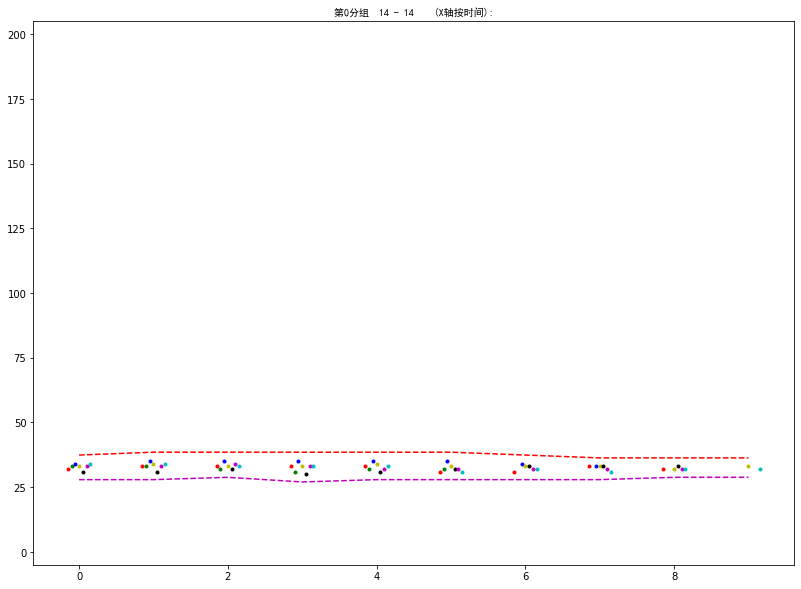

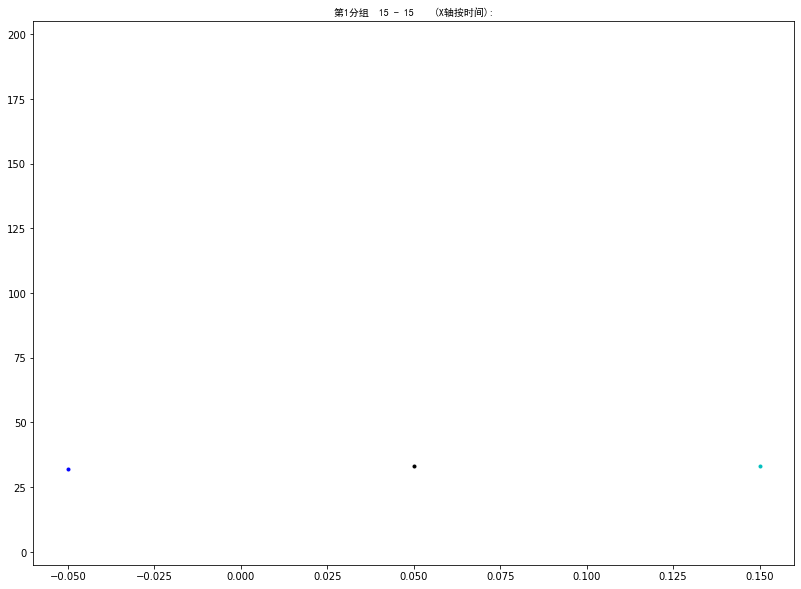

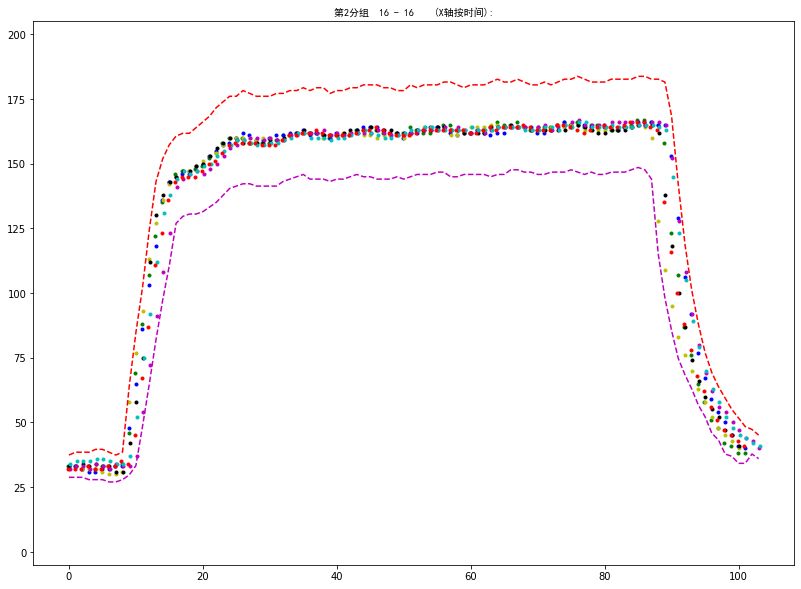

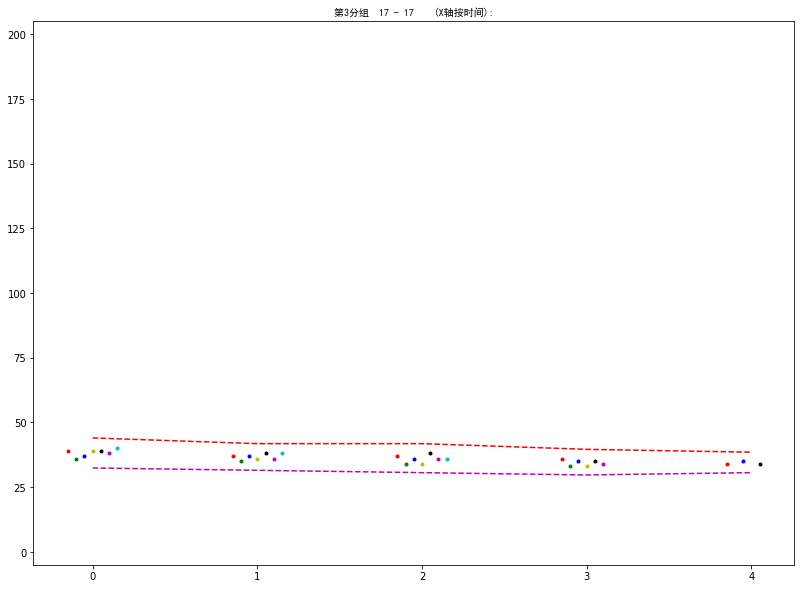

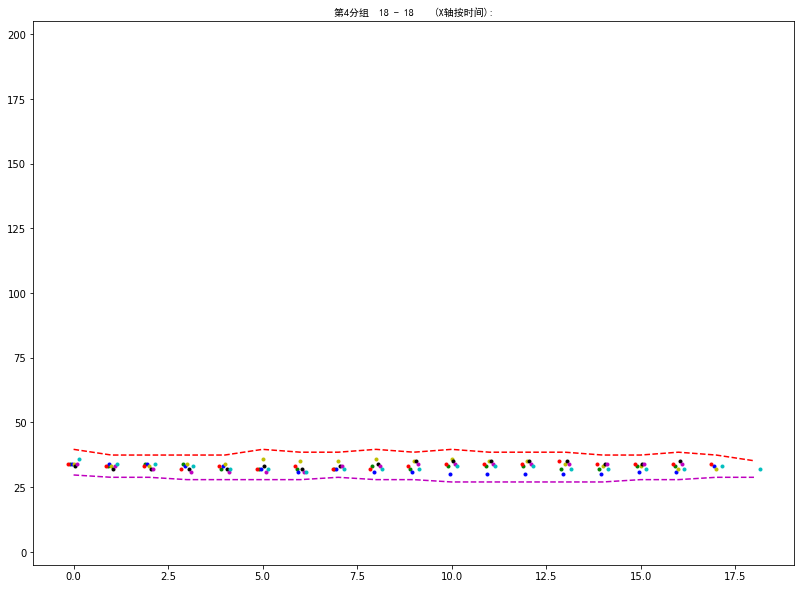

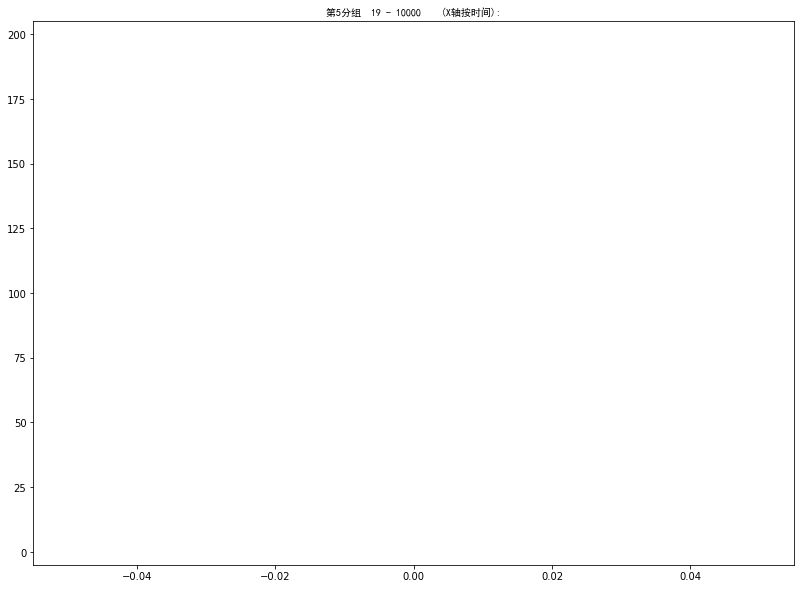

   start    end                                            maxload  \
0     14     14  [37.400000000000006, 38.5, 38.5, 38.5, 38.5, 3...   
1     15     15                               [36.300000000000004]   
2     16     16  [37.400000000000006, 38.5, 38.5, 38.5, 39.6, 3...   
3     17     17  [44.0, 41.800000000000004, 41.800000000000004,...   
4     18     18  [39.6, 37.400000000000006, 37.400000000000006,...   
5     19  10000                                                 []   

                                             minload  
0  [27.900000000000002, 27.900000000000002, 28.8,...  
1                                             [28.8]  
2  [28.8, 28.8, 28.8, 27.900000000000002, 27.9000...  
3                     [32.4, 31.5, 30.6, 29.7, 30.6]  
4  [29.7, 28.8, 28.8, 27.900000000000002, 27.9000...  
5                                                 []  


In [57]:
pointcolors = ['r.','g.','b.','y.','k.','m.','c.']
alllen = len(refdata[1])
x_jitter = [-0.15,-0.10,-0.05,0,0.05,0.10,0.15]
teststart = 1
testnum = 7
diff = 0.1
diffdata = pd.DataFrame()
for templen in range(alllen):
    start = refdata[teststart].iloc[templen]['start']
    end = refdata[teststart].iloc[templen]['end']
    if True:
        maxy = 200
        miny = 0
        maxx = 125
        minx = 0
        fig = plt.figure(1)
        fig.set_size_inches(30,10,forward=True)
        ax1 = fig.add_subplot(1,2,1)
        maxload = []
        minload = []
        for picno in range(teststart,testnum + 1):
            y1 = list(refdata[picno].iloc[templen]['loads'])
            x1 = range(len(y1))
            for tempx in x1:
                newmaxy = y1[tempx] * (1 + diff)
                newminy = y1[tempx] * (1 - diff)
                if tempx < len(maxload):
                    if maxload[tempx] < newmaxy:
                        maxload[tempx] = newmaxy
                    if minload[tempx] > newminy:
                        minload[tempx] = newminy
                else:
                    maxload.append(newmaxy)
                    minload.append(newminy)
            x1 = list(map(lambda n:n+x_jitter[picno % 7],x1))
            line1 = ax1.plot(x1,y1,pointcolors[picno % 7])
        xdiff = range(len(maxload))
        linemax = ax1.plot(xdiff,maxload,'r--')
        linemin = ax1.plot(xdiff,minload,'m--')
        #plt.xlim(minx - 5, maxx + 5)
        plt.ylim(miny - 5, maxy + 5)
        plt.title('第{}分组  {} - {}    (X轴按时间):'.format(templen,start,end),fontproperties='SimHei')
        plt.show()
        new = pd.DataFrame([[start,end,maxload,minload]],columns=['start','end','maxload','minload'])
        diffdata = pd.concat([diffdata, new], ignore_index=True)
print(diffdata)